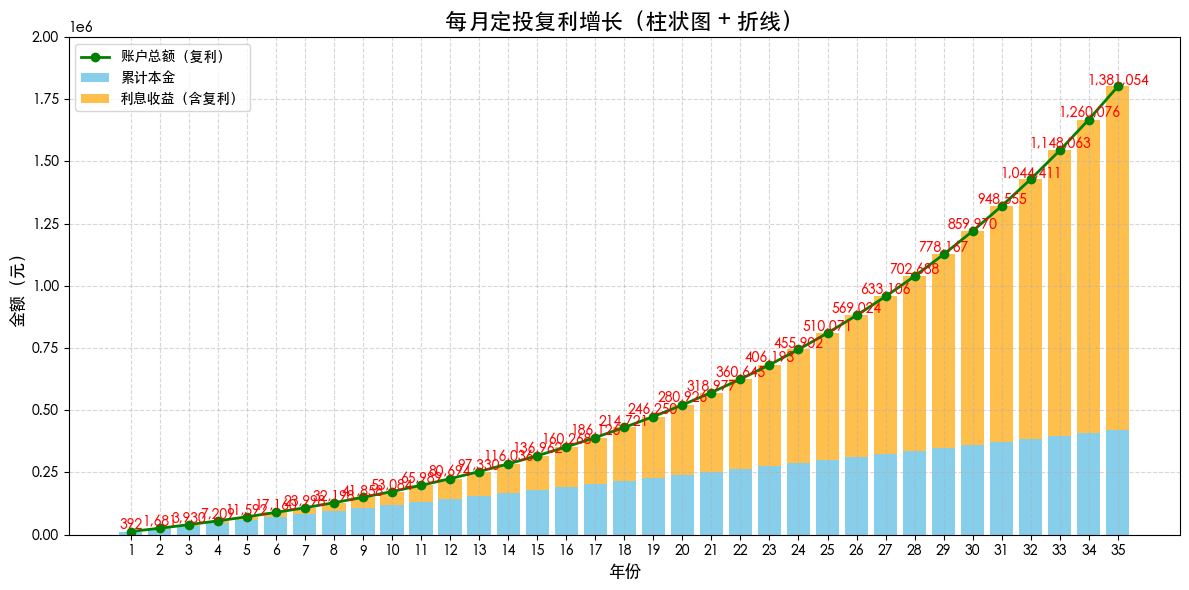

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#设置字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# --------------------------
# 参数设置
# --------------------------
monthly_invest = 1000
annual_rate = 0.07
years = 35

months = years * 12
monthly_rate = annual_rate / 12

# --------------------------
# 每月账户计算
# --------------------------
balance = 0
balances = []
principals = []

for m in range(1, months + 1):
    balance = balance * (1 + monthly_rate) + monthly_invest
    balances.append(balance)
    principals.append(monthly_invest * m)

interests = [balances[i] - principals[i] for i in range(months)]

# --------------------------
# 按年汇总
# --------------------------
year_indices = [(i+1)*12 - 1 for i in range(years)]
year_labels = np.arange(1, years+1)
principals_yearly = [principals[i] for i in year_indices]
balances_yearly = [balances[i] for i in year_indices]
interests_yearly = [interests[i] for i in year_indices]

# --------------------------
# 绘图（柱状图 + 折线）
# --------------------------
plt.figure(figsize=(12,6))

# 堆叠柱状图：本金 + 利息
plt.bar(year_labels, principals_yearly, label="累计本金", color='skyblue')
plt.bar(year_labels, interests_yearly, bottom=principals_yearly, label="利息收益（含复利）", color='orange', alpha=0.7)

# 折线显示总账户
plt.plot(year_labels, balances_yearly, label="账户总额（复利）", color='green', linewidth=2, marker='o')

# 每年利息数字标注
for x, y, interest in zip(year_labels, balances_yearly, interests_yearly):
    plt.text(x, y+5000, f"{int(interest):,}", ha='center', color='red', fontsize=10)

plt.title("每月定投复利增长（柱状图 + 折线）", fontsize=16)
plt.xlabel("年份", fontsize=12)
plt.ylabel("金额（元）", fontsize=12)
plt.xticks(year_labels)
plt.ylim([0,2000000]);
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
